In [172]:
!pip install tensorflow 

Defaulting to user installation because normal site-packages is not writeable


In [173]:
import tensorflow as tf

In [174]:
import os

In [175]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [176]:
if gpus:
    try:
        # Set memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            
        # Verify memory growth is set
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [177]:
tf.config.list_physical_devices('GPU')

[]

In [178]:
import cv2

In [179]:
import imghdr

In [180]:
data_dir = 'data'

In [181]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [182]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [183]:
from matplotlib import pyplot as plt

In [184]:
import numpy as np

In [185]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 515 files belonging to 3 classes.


In [186]:
data_iterator = data.as_numpy_iterator()

In [187]:
batch = data_iterator.next()

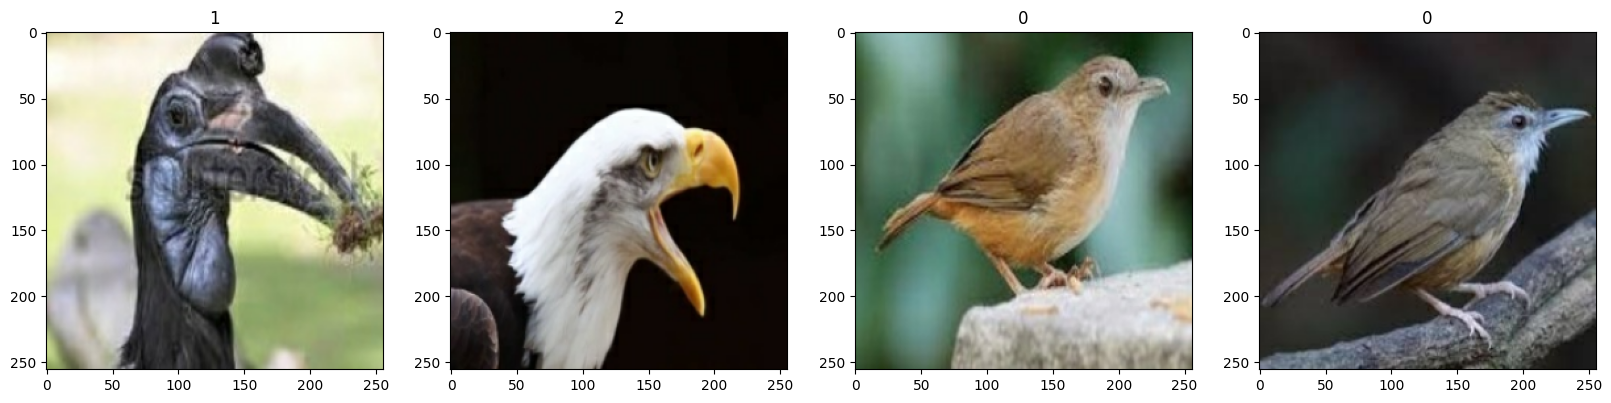

In [188]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [189]:
data = data.map(lambda x,y: (x/255, y))

In [190]:
data.as_numpy_iterator().next()

(array([[[[0.5058824 , 0.6745098 , 0.8392157 ],
          [0.5058824 , 0.6745098 , 0.8392157 ],
          [0.5058824 , 0.6745098 , 0.8392157 ],
          ...,
          [0.5058824 , 0.6745098 , 0.8392157 ],
          [0.5058824 , 0.6745098 , 0.8392157 ],
          [0.5058824 , 0.6745098 , 0.8392157 ]],
 
         [[0.5058824 , 0.6745098 , 0.8392157 ],
          [0.5058824 , 0.6745098 , 0.8392157 ],
          [0.5058824 , 0.6745098 , 0.8392157 ],
          ...,
          [0.5058824 , 0.6745098 , 0.8392157 ],
          [0.5058824 , 0.6745098 , 0.8392157 ],
          [0.5058824 , 0.6745098 , 0.8392157 ]],
 
         [[0.5058824 , 0.6745098 , 0.8392157 ],
          [0.5058824 , 0.6745098 , 0.8392157 ],
          [0.5058824 , 0.6745098 , 0.8392157 ],
          ...,
          [0.5058824 , 0.6745098 , 0.8392157 ],
          [0.5058824 , 0.6745098 , 0.8392157 ],
          [0.5058824 , 0.6745098 , 0.8392157 ]],
 
         ...,
 
         [[0.7240196 , 0.7004902 , 0.7083333 ],
          [0.71127

In [191]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [192]:
train_size

11

In [193]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [194]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [195]:
from tensorflow.keras.models import Sequential

In [196]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [197]:
model = Sequential()

In [198]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [199]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [200]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

In [201]:
logdir='logs'

In [202]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [203]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 12s 933ms/step - loss: 1.3036 - accuracy: 0.3778 - val_loss: 0.8709 - val_accuracy: 0.5938
Epoch 2/20
11/11 [==============================] - 10s 915ms/step - loss: 0.7565 - accuracy: 0.6477 - val_loss: 0.5110 - val_accuracy: 0.8646
Epoch 3/20
11/11 [==============================] - 10s 903ms/step - loss: 0.5102 - accuracy: 0.8466 - val_loss: 0.4529 - val_accuracy: 0.8542
Epoch 4/20
11/11 [==============================] - 10s 895ms/step - loss: 0.3419 - accuracy: 0.8807 - val_loss: 0.2845 - val_accuracy: 0.9167
Epoch 5/20
11/11 [==============================] - 10s 877ms/step - loss: 0.2382 - accuracy: 0.9148 - val_loss: 0.1174 - val_accuracy: 0.9479
Epoch 6/20
11/11 [==============================] - 10s 908ms/step - loss: 0.1199 - accuracy: 0.9545 - val_loss: 0.0839 - val_accuracy: 0.9688
Epoch 7/20
11/11 [==============================] - 10s 898ms/step - loss: 0.0487 - accuracy: 0.9886 - val_loss: 0.1064 - val_accuracy: 0.9792

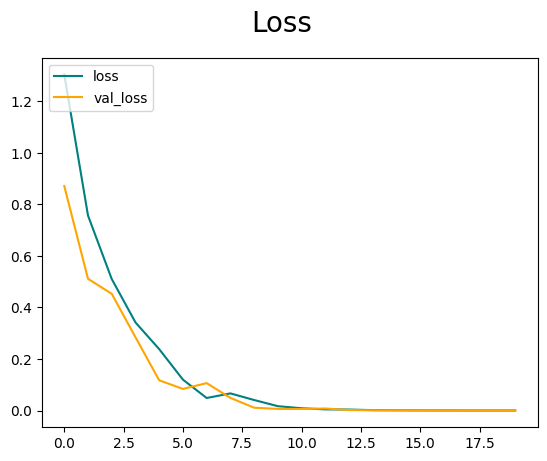

In [204]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

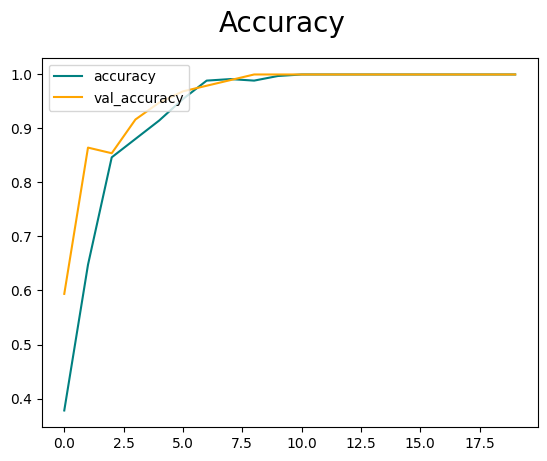

In [205]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [206]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [207]:
accuracy_metric = tf.keras.metrics.CategoricalAccuracy()

In [208]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    accuracy_metric.update_state(y, y_pred)


1/1 [==============================] - 0s 258ms/step


In [209]:
accuracy = accuracy_metric.result().numpy()
print("Test Accuracy:", accuracy)


Test Accuracy: 0.1875


In [210]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

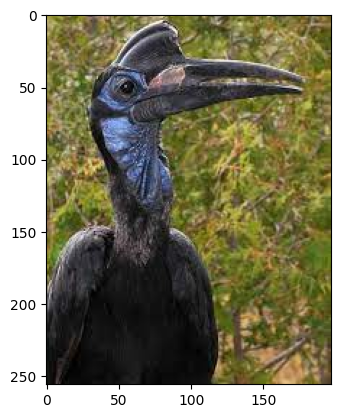

In [211]:
img = cv2.imread('4.jpeg')
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_array = np.asarray(img)
    plt.imshow(img_array)
    plt.show()
else:
    print('Could not read image')

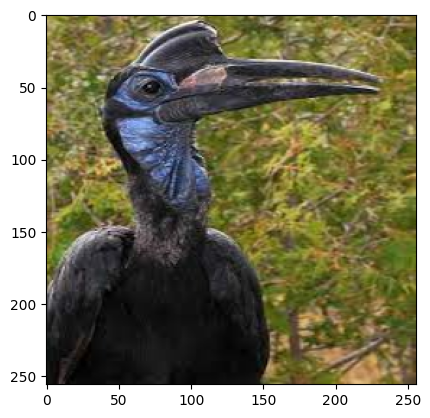

In [212]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [213]:
class_names = ["ABBOTTS BABBLER", "ABYSSINIAN GROUND HORNBILL", "BALD EAGLE"]
yhat = model.predict(np.expand_dims(resize / 255, 0))

# get predicted class index
class_idx = tf.argmax(yhat, axis=1)[0]

predicted_class = class_names[class_idx]
print(f"Predicted class is {predicted_class}")


1/1 [==============================] - 0s 139ms/step
Predicted class is ABYSSINIAN GROUND HORNBILL
